## Arbol de decisión
#### La tarea en este conjunto de datos es entrenar un clasificador de árboles de decisión para clasificar el tipo de iris en función de las propiedades dadas, que son el tamaño del sépalo y el pétalo.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn import tree


Cargamos el dataset y lo convertimos en un DataFrame. Vamos a utilizar un dataset conocido, el de las flores de iris.

In [6]:
iris = datasets.load_iris()  # load iris dataset
x = iris.data
y = iris.target
d = [{"sepal_length":row[0],
      "sepal_width":row[1],
      "petal_length":row[2],
      "petal_width":row[3]} for row in x]
df = pd.DataFrame(d) # construimos el df
df["types"] = y # asignamos los tipos
df = df.sample(frac=1.0) # mezclamos las filas y tomamos una muestra
df.head()

,sepal_length,sepal_width,petal_length,petal_width,types
71,6.1,2.8,4.0,1.3,1
42,4.4,3.2,1.3,0.2,0
97,6.2,2.9,4.3,1.3,1
94,5.6,2.7,4.2,1.3,1
11,4.8,3.4,1.6,0.2,0


Graficamos las relaciones entre las caractéristicas de la flor

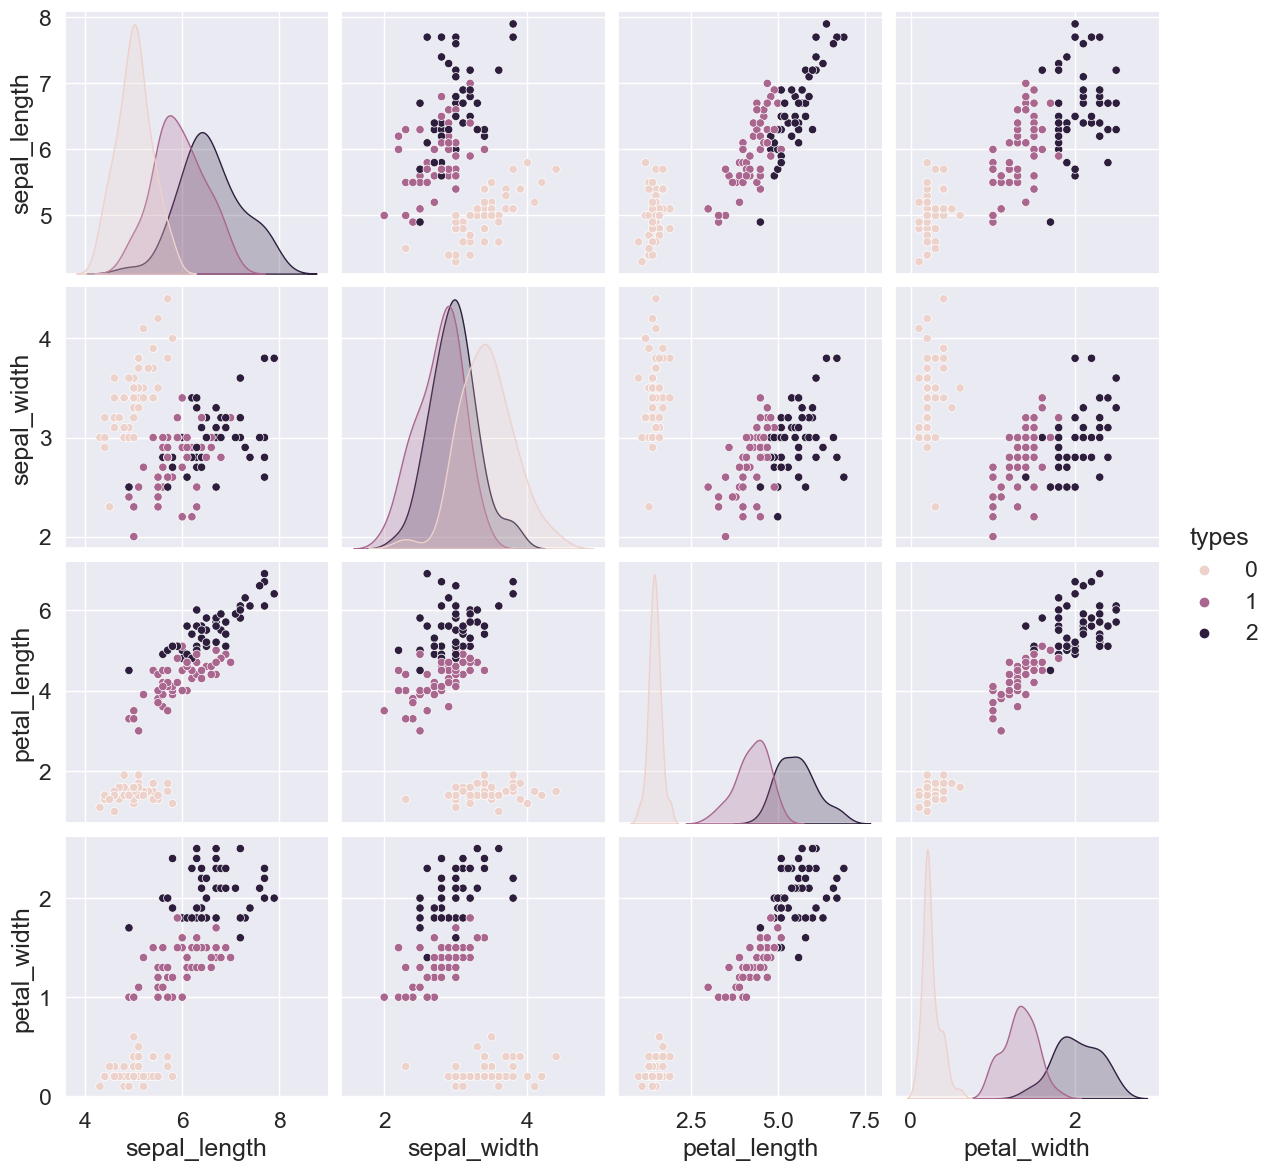

In [13]:
sns.set(font_scale=1.5)
sns.pairplot(df,hue="types",size=3);
plt.show()

Al igual que con la regresión lineal, vamos a separar el dataset para el entrenamiento

In [8]:
# train test split, ratio = 0.8
features = df[["sepal_length","sepal_width","petal_length","petal_width"]]
types = df["types"]
train_features, test_features, train_types, test_types = train_test_split(features,types,train_size=0.8, random_state=1)

Creamos el modelo y lo entrenamos

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_types)

Predecimos

In [10]:
prediction = clf.predict(test_features)

Evaluacion de la clasificacion multi-clase

In [14]:
print(classification_report(test_types, prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00        12
       type1       0.88      1.00      0.93         7
       type2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### A partir del resultado, podemos ver que con una configuración de árbol de decisión predeterminada de sciki-learn, tenemos un modelo de clasificación múltiple con puntaje macro_avg f1 = 0.97.